In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
import time

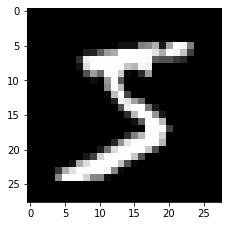

In [5]:
plt.figure(figsize=(16,4));

# image 0
plt.subplot(1, 4, 1);
plt.imshow(X_train[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));

In [6]:
len(X_train)

60000

In [7]:
len(X_train[0]),len(X_train[0][0]), 28*28

(28, 28, 784)

In [8]:
X_train2 = X_train.reshape(60000,784)

In [32]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=20)
pca_result = pca.fit_transform(X_train2)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 1.2944450378417969 seconds


In [33]:
len(X_train2), len(pca_result)

(60000, 60000)

In [34]:
pca_result

array([[ 123.93258785, -312.67428228,  -24.51404824, ...,  309.05177345,
         282.87690416,  162.31521702],
       [1011.71837401, -294.85706755,  596.33958648, ...,   40.55313941,
          57.16652578, -102.32342996],
       [ -51.84960916,  392.17314014, -188.50973605, ..., -121.8374827 ,
          -7.93725058, -433.95115122],
       ...,
       [-178.05345286,  160.07817275, -257.61305063, ...,  -36.2330924 ,
         111.08173621,  240.24474281],
       [ 130.60607066,   -5.59199053,  513.85870235, ..., -139.77414432,
         -65.9559405 ,  192.72817566],
       [-173.43595326,  -24.71880459,  556.01890152, ...,  270.2189623 ,
          95.49035848, -207.77961157]])

In [59]:
pca_x = [pca_result[i][0] for i in range(0,len(pca_result))]
pca_y = [pca_result[i][1] for i in range(0,len(pca_result))]

(-1800, 2500)

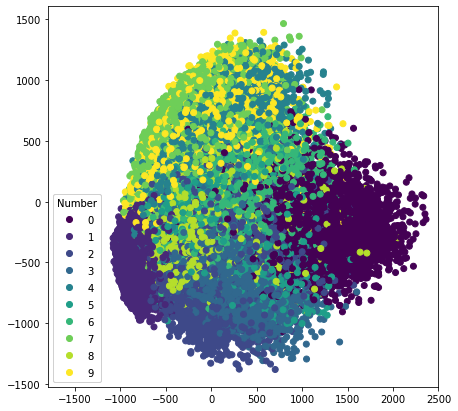

In [77]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
scatter_pse = ax.scatter(pca_x, pca_y, c=y_train)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter_pse.legend_elements(), loc="lower left", title="Number")
ax.add_artist(legend)

ax.set_xlim([-1800,2500])

In [37]:
# pca_result

In [104]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

tse = TSNE(random_state=44,perplexity=100., learning_rate=1000).fit_transform(pca_result[0:10000])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 48.529613971710205 seconds


In [105]:
tse_x = [tse[i][0] for i in range(0,len(tse))]
tse_y = [tse[i][1] for i in range(0,len(tse))]

In [106]:
str_y_train = [str(i) for i in y_train[0:10000]]

In [107]:
np.unique(y_train), np.unique(str_y_train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1'))

In [108]:
# N = 45
# x, y = np.random.rand(2, N)
# c = np.random.randint(1, 5, size=N)
# s = np.random.randint(10, 220, size=N)

# fig, ax = plt.subplots(figsize=(7,7))

# scatter = ax.scatter(x, y, c=c, s=s)

# # produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
# ax.add_artist(legend1)

# # produce a legend with a cross section of sizes from the scatter
# #handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# #legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

# plt.show()

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

(-110, 80)

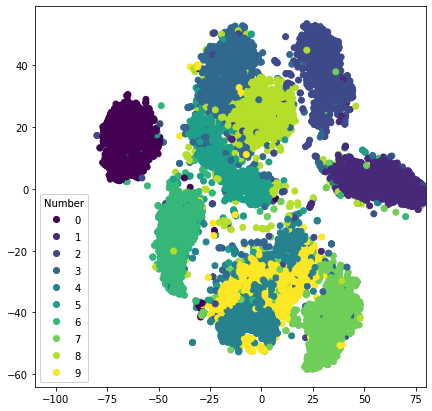

In [109]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
scatter_tse = ax.scatter(tse_x, tse_y, c = y_train[0:10000])

# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter_tse.legend_elements(), loc="lower left", title="Number")
ax.add_artist(legend)

ax.set_xlim([-110,80])


In [110]:
from sklearn.cluster import KMeans

In [111]:
km = KMeans(n_clusters=10, random_state=42).fit(tse)

In [112]:
y_pred = km.predict(tse)

In [113]:
y_pred

array([2, 0, 9, ..., 6, 9, 7], dtype=int32)

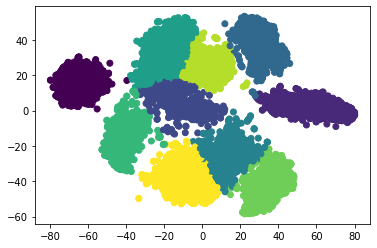

In [114]:
plt.scatter(tse_x, tse_y, c = y_pred)

In [98]:
km.cluster_centers_, km.labels_, 

(array([[-58.197807 , -11.204068 ],
        [ 46.333004 ,  -5.0393457],
        [ 19.435545 ,  19.659946 ],
        [-10.399215 ,  -5.730132 ],
        [-16.535267 , -51.67599  ],
        [ 35.07502  , -51.88154  ],
        [ -9.40256  ,  56.030785 ],
        [-53.585117 ,  37.036057 ],
        [ 34.200733 ,  66.929474 ],
        [ 62.206238 ,  36.574535 ]], dtype=float32),
 array([3, 7, 4, ..., 0, 4, 5], dtype=int32))

In [99]:
km.inertia_

2621627.0

In [100]:
for i in km.cluster_centers_:
    print(i[0], i[1])

-58.197807 -11.204068
46.333004 -5.0393457
19.435545 19.659946
-10.399215 -5.730132
-16.535267 -51.67599
35.07502 -51.88154
-9.40256 56.030785
-53.585117 37.036057
34.200733 66.929474
62.206238 36.574535


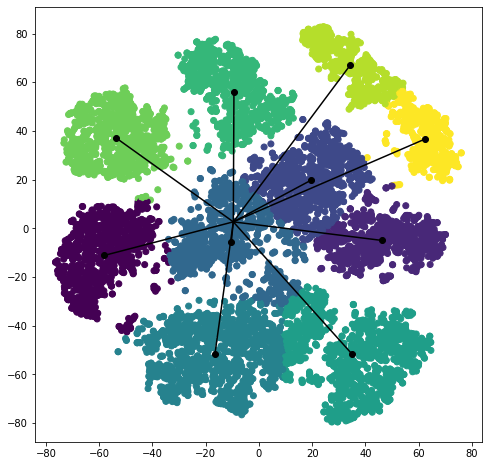

In [101]:
plt.figure(figsize=(8,8))
plt.scatter(tse_x[1:], tse_y[1:], c = y_pred[1:], label=y_pred[1:])

for i in km.cluster_centers_:
    plt.scatter(i[0], i[1], c='k')

#plt.scatter(tse_x[0], tse_y[0], c='red', marker='X', s=500)

for i in km.cluster_centers_:
    plt.plot([i[0],tse_x[0]], [i[1],tse_y[0]], c='k')


In [102]:
bla = []
for i in range(0, len(km.cluster_centers_)):
    print(i, distance.euclidean(tse[0], km.cluster_centers_[i]))
    bla.append(distance.euclidean(tse[0], km.cluster_centers_[i]))

NameError: name 'distance' is not defined

In [103]:
bla

[]

In [48]:
bla = np.array(bla)

In [49]:
bla.sum()

488.32733154296875

In [52]:
j = 0.0
for i in bla:
    j+=(i/bla.sum())*100
    print((i/bla.sum())*100)
print(j)

13.34964637712316
11.356622749977971
9.167919933806248
17.77721133817996
1.9399739462088266
10.123628957517134
18.237400720307022
10.373765507130264
7.673830469749418
100.0


In [ ]:
j = 0.0
for i in bla:
    j+=(i/bla.sum())*100
    print((i/bla.sum())*100)
print(j)

In [107]:
for i in bla:
    print(1 - i/bla.sum())

0.9808710691406762
0.8709458006139665
0.8212037839319899
0.8982251534448055
0.9080222569442526
0.8968928523074013
0.9228571787587991
0.8168693660966564
0.8841125387614523


In [41]:
from scipy.spatial import distance
a = (1, 2)
b = (4, 5)
c = (7, 8)
dst = distance.euclidean(a, b)

In [42]:
distance.euclidean(a, b)

4.242640687119285

In [43]:
distance.euclidean(b, c)

4.242640687119285